In [3]:
import numpy as np 
import warnings
from tabulate import tabulate
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix ,classification_report
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler
import scipy.sparse
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
import math
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import BaggingClassifier
from scipy import stats
from scipy.stats import kruskal
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve

In [4]:
def plot_boxplots(data, columns_to_plot):
    
    plt.figure(figsize=(16, len(columns_to_plot) * 5))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(len(columns_to_plot), 1, i)
        sns.boxplot(data=data, x=column)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [5]:
def calculate_multiplier(highest_value, mean, std):
    if std == 0:
        return float('inf')  
    return math.floor((highest_value - mean) / std)

In [6]:
def calculate_highest_allowed(data, column):
    highest_allowed = data[column].mean() + analyze_columns(data, columns_to_analyze) * data[column].std()
    return highest_allowed

In [7]:
def plot_histograms(data, columns_to_plot):
   
    plt.figure(figsize=(16, len(columns_to_plot) * 5))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(len(columns_to_plot), 1, i)
        sns.histplot(data[column], kde=True)  
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [8]:
def analyze_columns(data, columns_to_analyze):
    for column in columns_to_analyze:
        print(f"Statistics for {column}:")
        mean = data[column].mean()
        highest_value = data[column].max()
        std = data[column].std()
        min_value = data[column].min()
        lowest_value = min_value  
        
        actual_multiplier = (highest_value - mean) / std if std != 0 else 0
        
        rounded_multiplier = math.floor(actual_multiplier * 10) / 10  
        
        highest_allowed = mean + (rounded_multiplier * std if std != 0 else 0)
        lowest_allowed = max(mean - (rounded_multiplier * std if std != 0 else 0), 0)
        
        print(f"  Mean: {mean}")
        print(f"  Std: {std}")
        print(f"  Min: {min_value}")
        print(f"  Lowest Value: {lowest_value}")
        print(f"  Max: {highest_value}")
        print(f"  Actual Multiplier: {actual_multiplier:.2f}")
        print(f"  Rounded Multiplier: {rounded_multiplier}")
        print(f"  Highest Allowed: {highest_allowed}")
        print(f"  Lowest Allowed: {lowest_allowed}")
        print("-" * 40)

In [9]:
def analyze_and_remove_outliers(data, columns_to_analyze):
    data_2 = data.copy()  

    for column in columns_to_analyze:
        print(f"Analyzing column: {column}")
        mean = data[column].mean()
        highest_value = data[column].max()
        std = data[column].std()
        min_value = data[column].min()
        
        actual_multiplier = (highest_value - mean) / std if std != 0 else 0
        
        rounded_multiplier = math.floor(actual_multiplier * 10) / 10  
        
        highest_allowed = mean + (rounded_multiplier * std if std != 0 else 0)
        lowest_allowed = max(mean - (rounded_multiplier * std if std != 0 else 0), 0)
        
        print(f"  Mean: {mean}")
        print(f"  Std: {std}")
        print(f"  Min: {min_value}")
        print(f"  Max: {highest_value}")
        print(f"  Actual Multiplier: {actual_multiplier:.2f}")
        print(f"  Rounded Multiplier: {rounded_multiplier}")
        print(f"  Highest Allowed: {highest_allowed}")
        print(f"  Lowest Allowed: {lowest_allowed}")
        
        data_2 = data_2[
            (data_2[column] >= lowest_allowed) & 
            (data_2[column] <= highest_allowed)
        ]
        print(f"  Outliers removed for {column}. Remaining rows: {len(data_2)}")
        print("-" * 40)
    
    return data_2

In [10]:
def remove_outliers_zscore(data_2, columns_to_analyze, threshold=3.0):
    
    data_3 = data_2.copy()  

    for column in columns_to_analyze:
        print(f"Analyzing column: {column}")
        
        column_zscore = zscore(data_3[column], nan_policy='omit')
        
        outliers = (abs(column_zscore) > threshold)
        
        print(f"  Outliers detected in {column}: {outliers.sum()} rows")
        
        data_3 = data_3.loc[~outliers]
        print(f"  Remaining rows after removing outliers for {column}: {len(data_3)}")
        print("-" * 40)
    
    return data_3

In [11]:
def visualize_outliers(data, column_to_analyze, threshold=3.0):
    if column_to_analyze not in data.columns:
        raise ValueError(f"Column '{column_to_analyze}' not found in the dataset.")
    
    z_scores = zscore(data[column_to_analyze])
    outliers = abs(z_scores) > threshold
    original_data = data[column_to_analyze]
    cleaned_data = original_data[~outliers]

    plt.figure(figsize=(10, 6))

    plt.scatter(range(len(original_data)), original_data, label="Original Data", color="blue")

    plt.scatter(np.where(outliers)[0], original_data[outliers], label="Outliers", color="red", marker='x', s=100)

    plt.scatter(range(len(cleaned_data)), cleaned_data, label="Cleaned Data", color="green")

    plt.title(f"Datapoints and Outliers for '{column_to_analyze}'", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()
    return data.loc[~outliers]

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

In [13]:
data = pd.read_csv("loan_approval_dataset.csv")
data.shape
print(list(data.columns))
print(data.shape)
print(data.head)

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
(4269, 13)
<bound method NDFrame.head of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes   

In [14]:
data.isnull().mean()*100
data.columns = data.columns.str.strip()

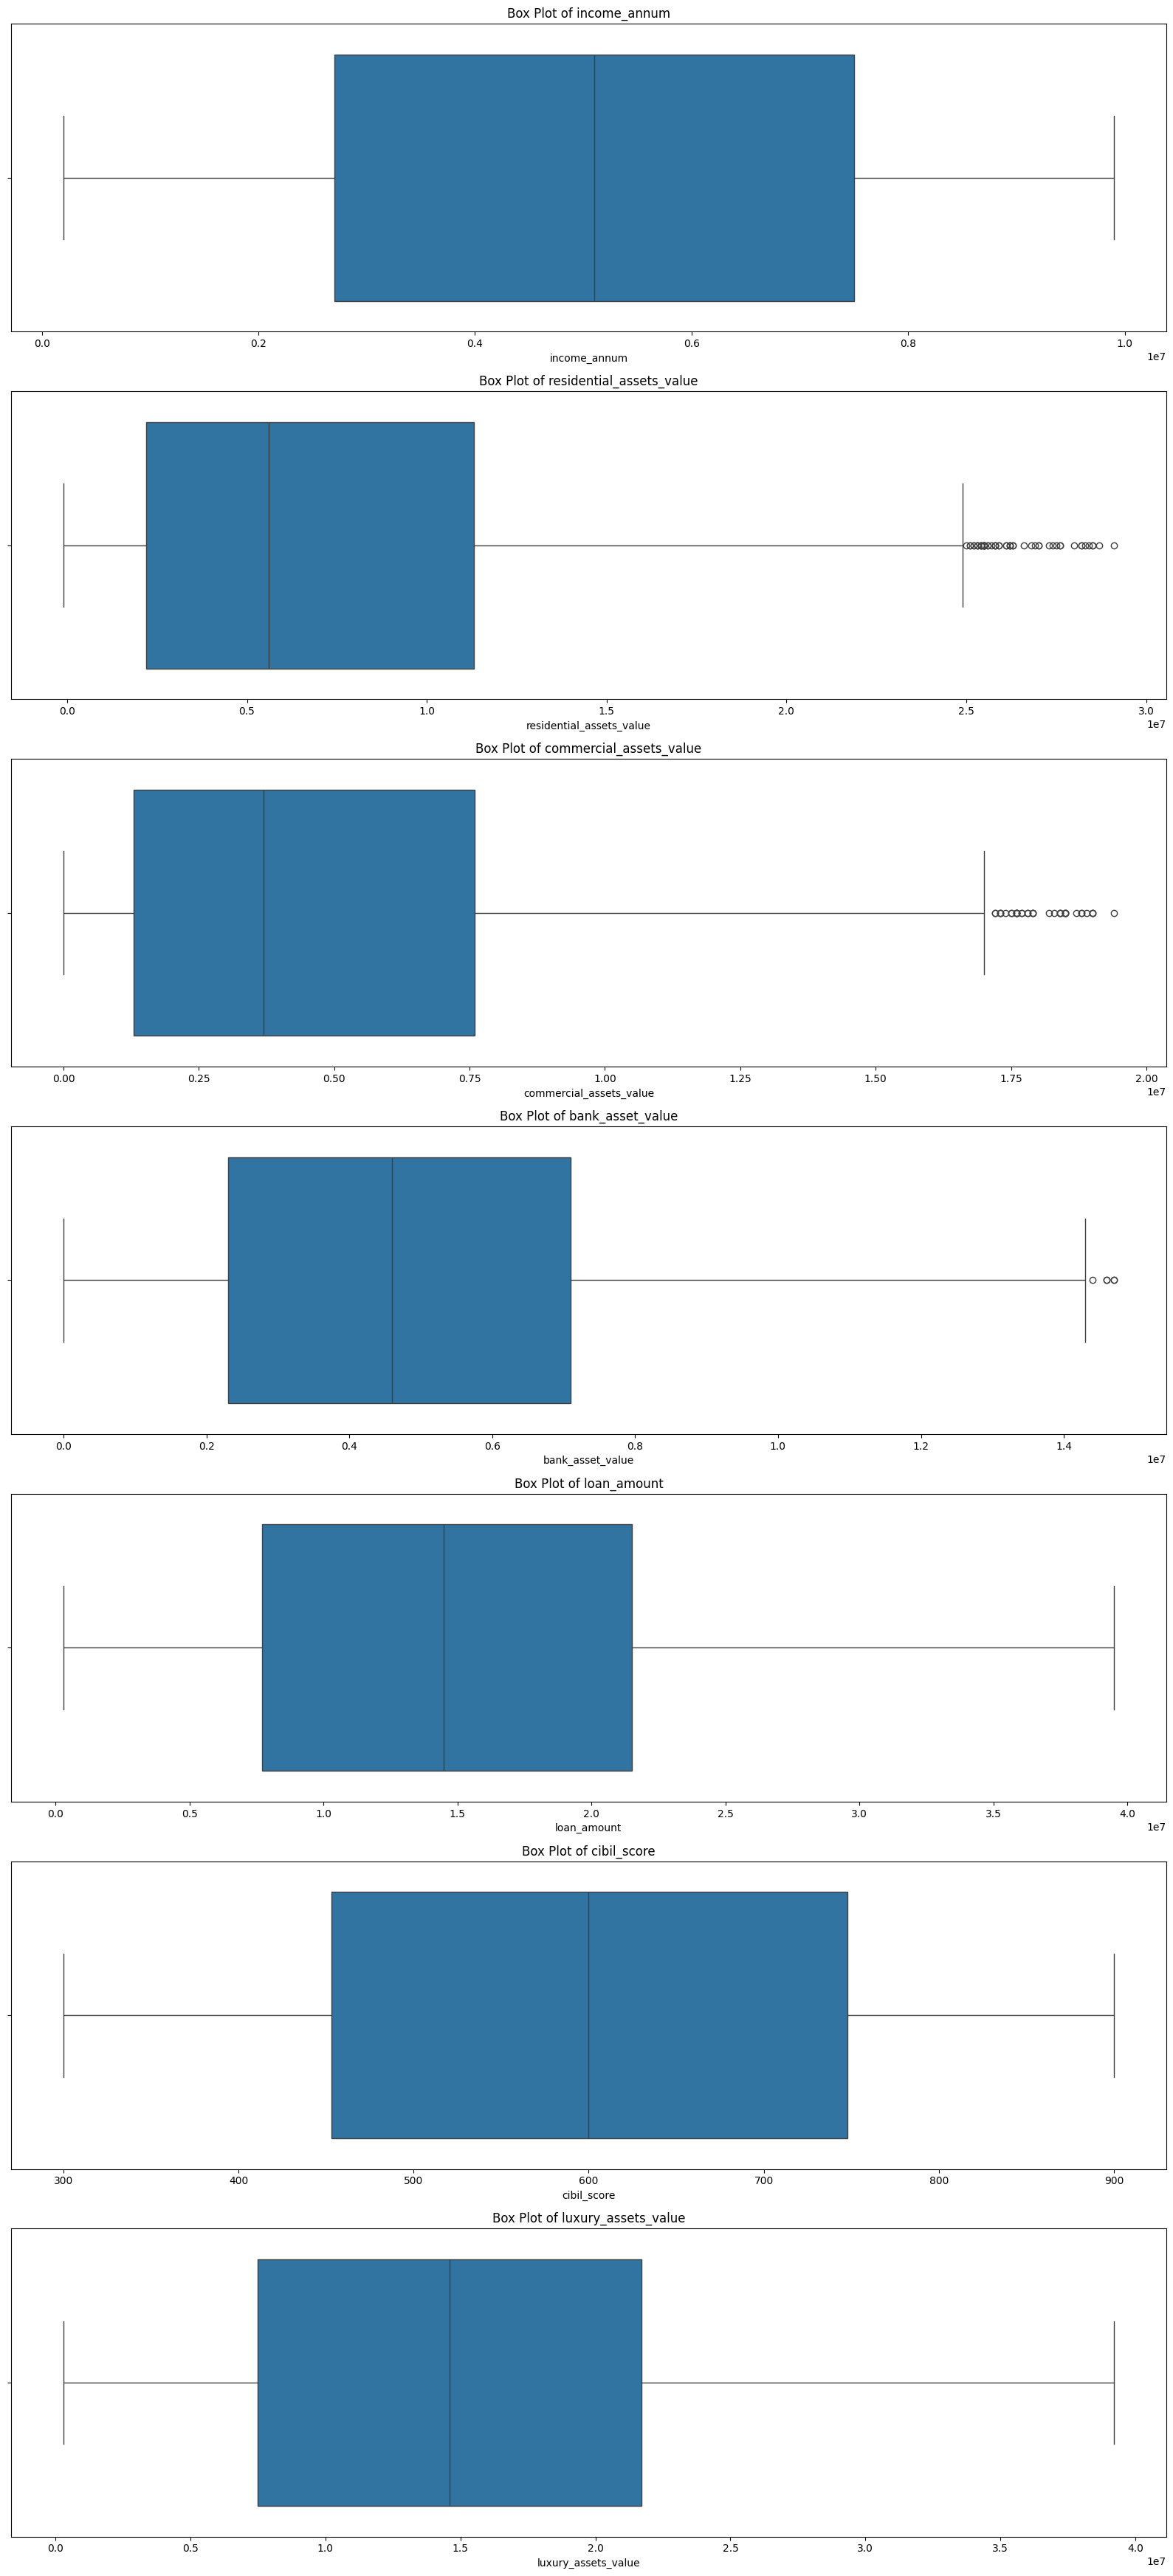

In [15]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value'
]

plot_boxplots(data, columns_to_plot)

In [16]:
data = remove_outliers(data, 'residential_assets_value')
data = remove_outliers(data, 'commercial_assets_value')
data = remove_outliers(data, 'bank_asset_value')
data.shape

(4173, 13)

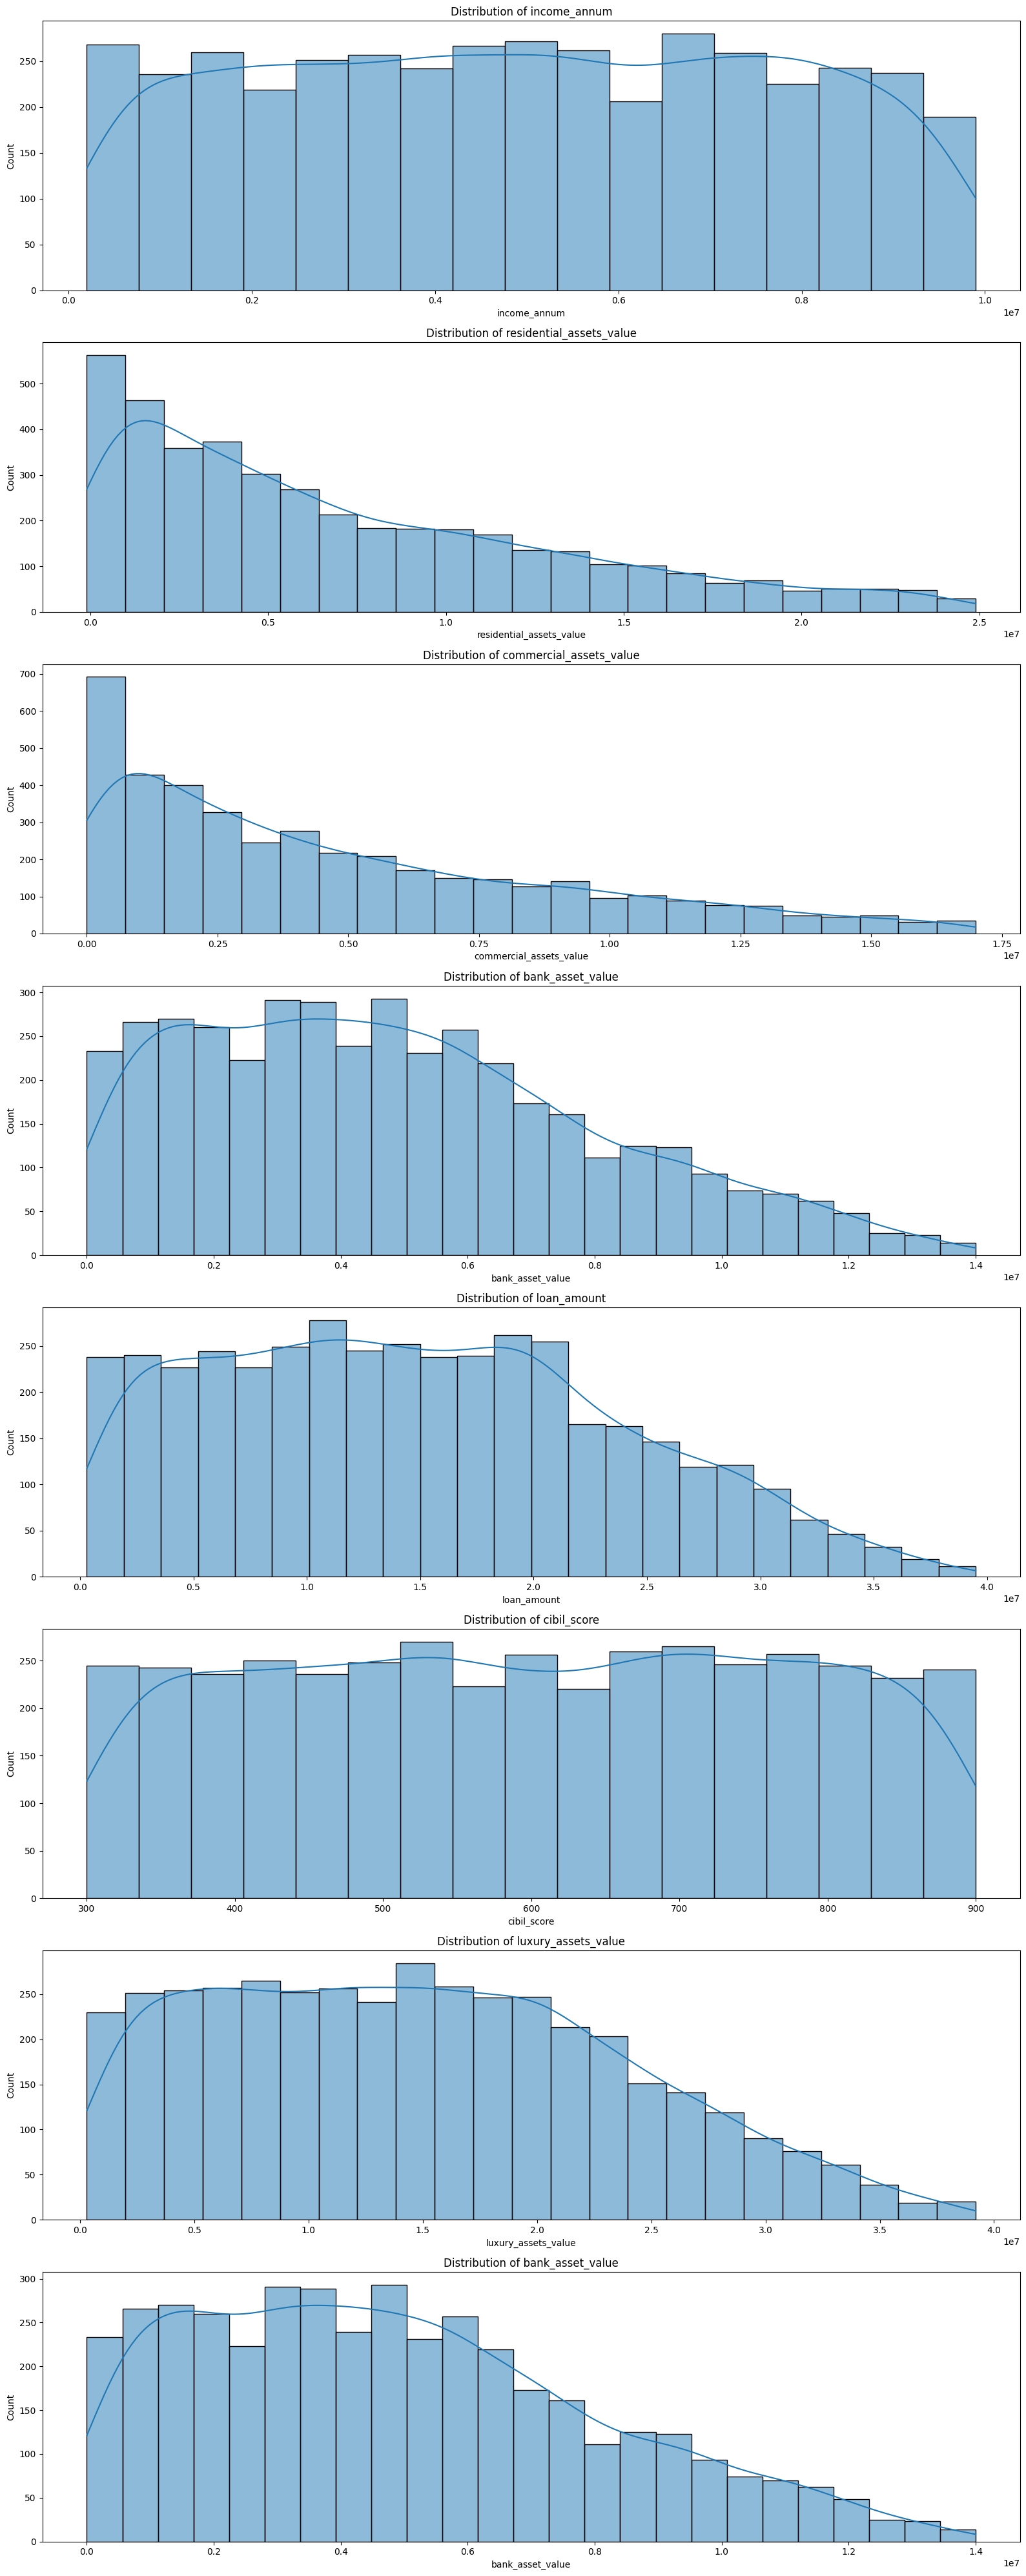

In [17]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

plot_histograms(data, columns_to_plot)

In [18]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

analyze_columns(data, columns_to_plot)

Statistics for income_annum:
  Mean: 4958686.796069974
  Std: 2758154.370768968
  Min: 200000
  Lowest Value: 200000
  Max: 9900000
  Actual Multiplier: 1.79
  Rounded Multiplier: 1.7
  Highest Allowed: 9647549.226377219
  Lowest Allowed: 269824.36576272827
----------------------------------------
Statistics for residential_assets_value:
  Mean: 7182362.808531033
  Std: 6136651.008089689
  Min: -100000
  Lowest Value: -100000
  Max: 24900000
  Actual Multiplier: 2.89
  Rounded Multiplier: 2.8
  Highest Allowed: 24364985.631182157
  Lowest Allowed: 0
----------------------------------------
Statistics for commercial_assets_value:
  Mean: 4818068.535825545
  Std: 4204860.608898725
  Min: 0
  Lowest Value: 0
  Max: 17000000
  Actual Multiplier: 2.90
  Rounded Multiplier: 2.8
  Highest Allowed: 16591678.240741976
  Lowest Allowed: 0
----------------------------------------
Statistics for bank_asset_value:
  Mean: 4863575.365444524
  Std: 3168140.6096054134
  Min: 0
  Lowest Value: 0
  Max:

In [19]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

data_2 = analyze_and_remove_outliers(data, columns_to_plot)

print("Cleaned Data:")
print(data_2)

Analyzing column: income_annum
  Mean: 4958686.796069974
  Std: 2758154.370768968
  Min: 200000
  Max: 9900000
  Actual Multiplier: 1.79
  Rounded Multiplier: 1.7
  Highest Allowed: 9647549.226377219
  Lowest Allowed: 269824.36576272827
  Outliers removed for income_annum. Remaining rows: 4041
----------------------------------------
Analyzing column: residential_assets_value
  Mean: 7182362.808531033
  Std: 6136651.008089689
  Min: -100000
  Max: 24900000
  Actual Multiplier: 2.89
  Rounded Multiplier: 2.8
  Highest Allowed: 24364985.631182157
  Lowest Allowed: 0
  Outliers removed for residential_assets_value. Remaining rows: 4004
----------------------------------------
Analyzing column: commercial_assets_value
  Mean: 4818068.535825545
  Std: 4204860.608898725
  Min: 0
  Max: 17000000
  Actual Multiplier: 2.90
  Rounded Multiplier: 2.8
  Highest Allowed: 16591678.240741976
  Lowest Allowed: 0
  Outliers removed for commercial_assets_value. Remaining rows: 3989
---------------------

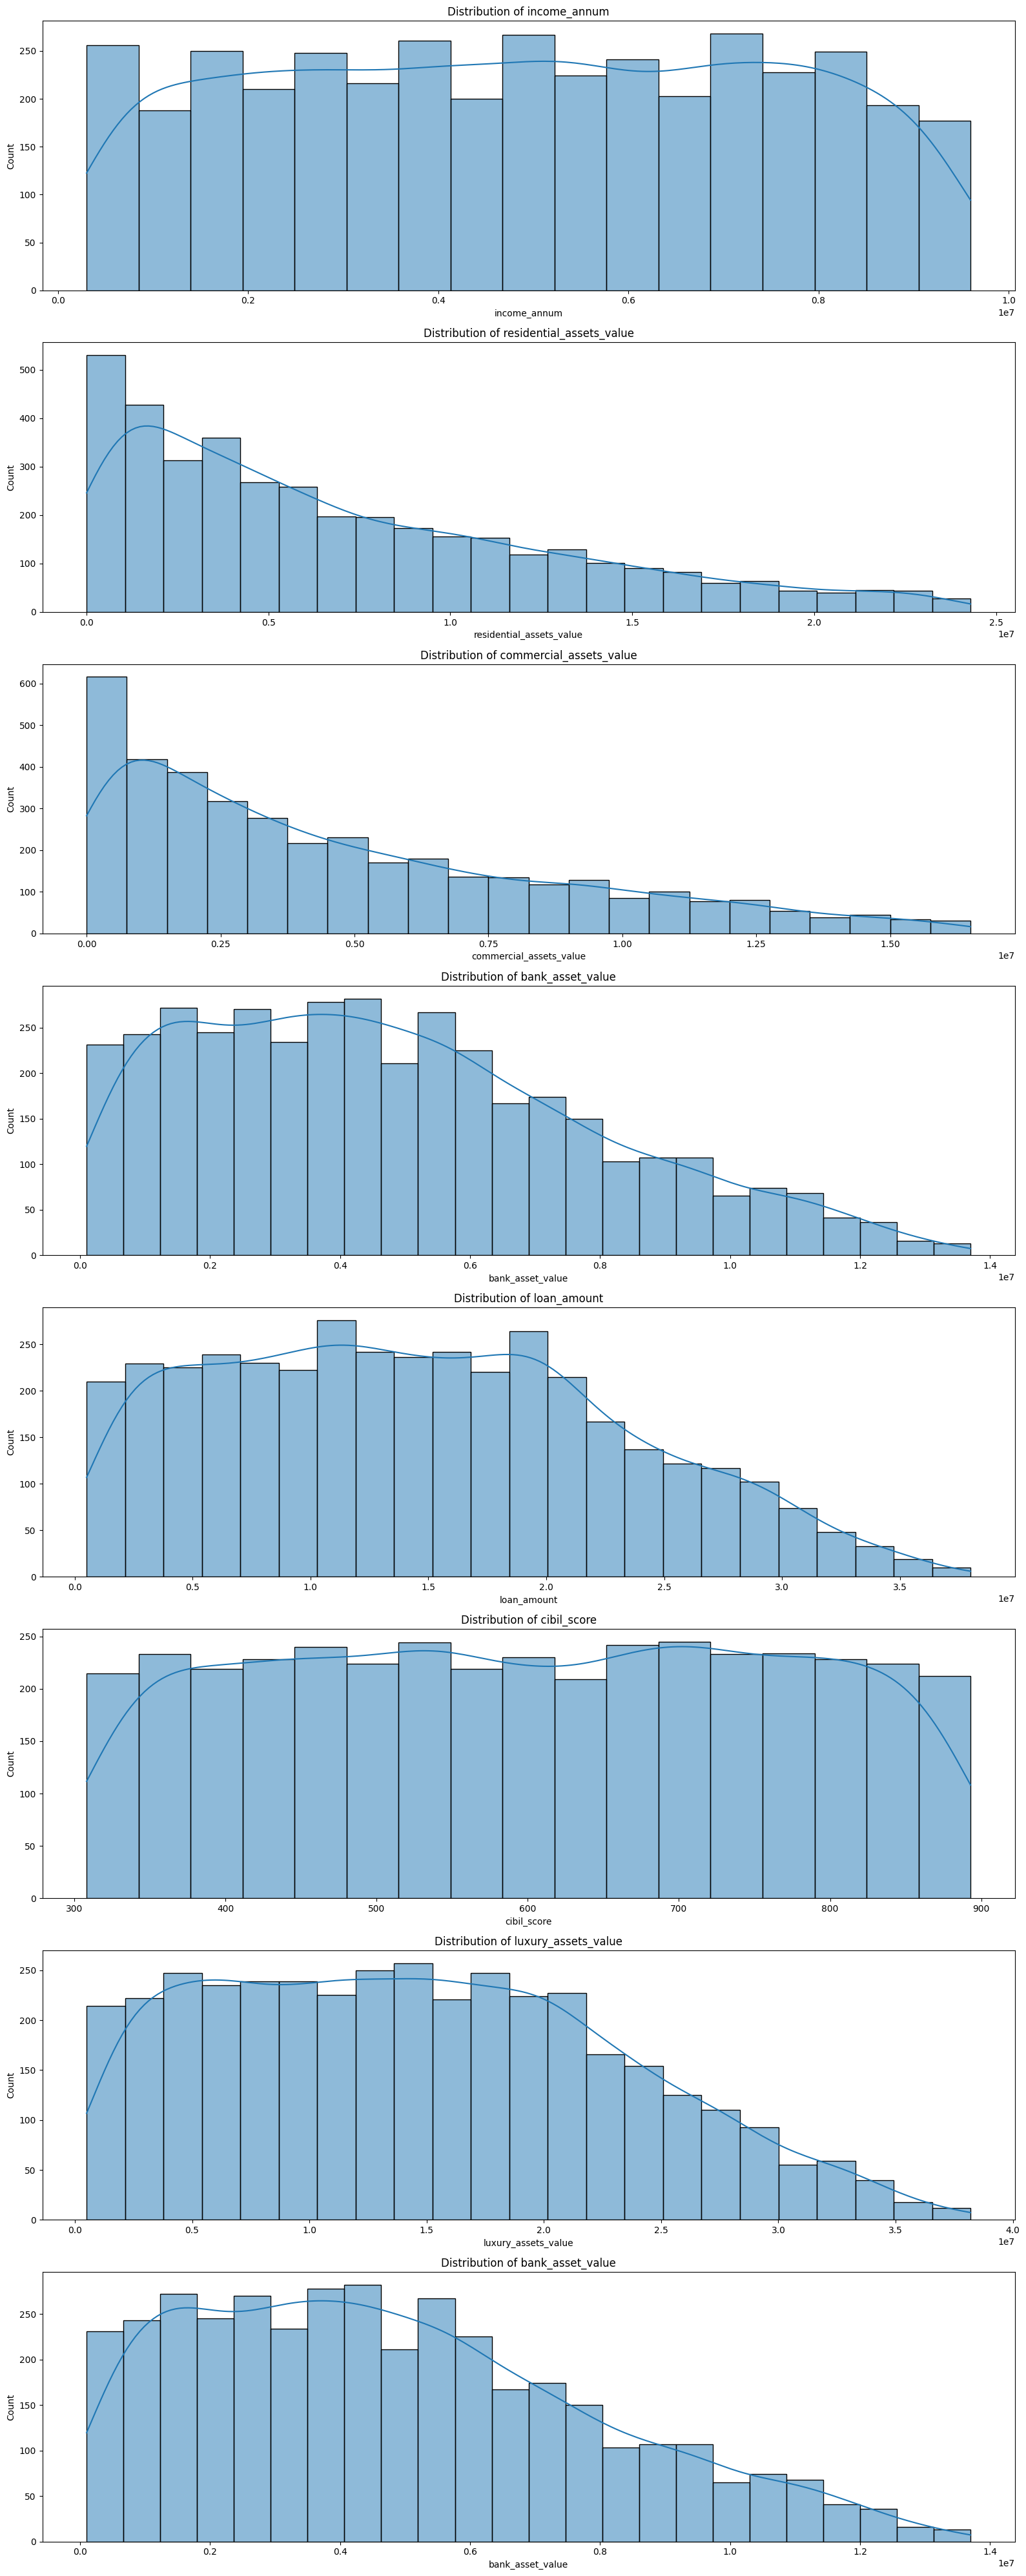

In [20]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

plot_histograms(data_2, columns_to_plot)

In [21]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

data_3 = remove_outliers_zscore(data_2, columns_to_plot)

print("Cleaned Data:")
print(data_3)

Analyzing column: income_annum
  Outliers detected in income_annum: 0 rows
  Remaining rows after removing outliers for income_annum: 3879
----------------------------------------
Analyzing column: residential_assets_value
  Outliers detected in residential_assets_value: 0 rows
  Remaining rows after removing outliers for residential_assets_value: 3879
----------------------------------------
Analyzing column: commercial_assets_value
  Outliers detected in commercial_assets_value: 0 rows
  Remaining rows after removing outliers for commercial_assets_value: 3879
----------------------------------------
Analyzing column: bank_asset_value
  Outliers detected in bank_asset_value: 0 rows
  Remaining rows after removing outliers for bank_asset_value: 3879
----------------------------------------
Analyzing column: loan_amount
  Outliers detected in loan_amount: 0 rows
  Remaining rows after removing outliers for loan_amount: 3879
----------------------------------------
Analyzing column: cibi

In [22]:
data_3.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Processing column: income_annum


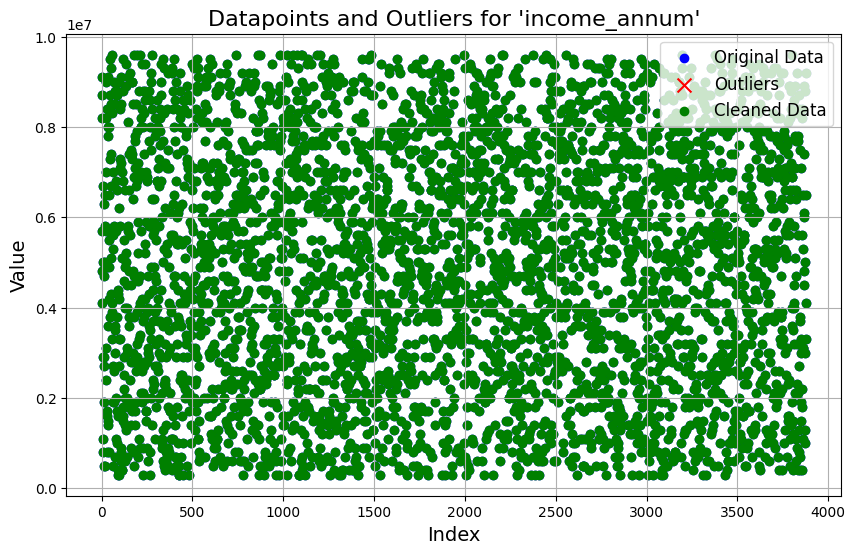

Processing column: residential_assets_value


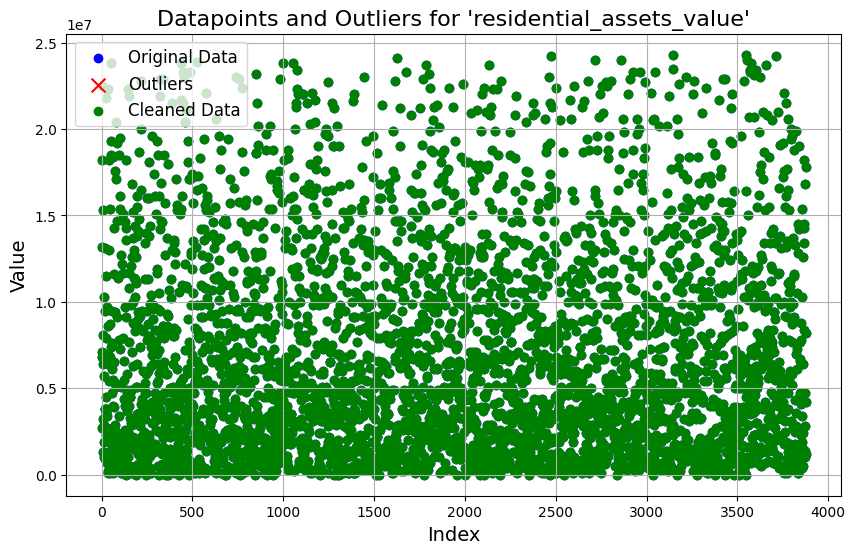

Processing column: commercial_assets_value


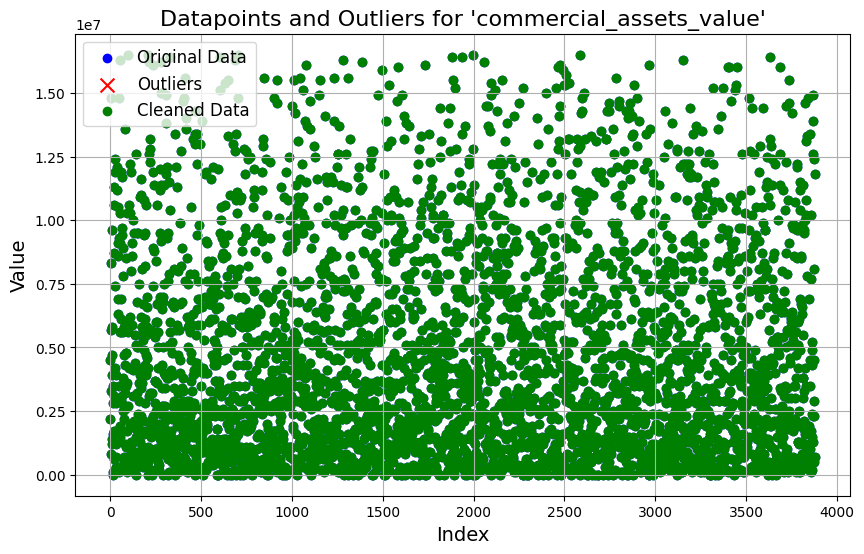

Processing column: bank_asset_value


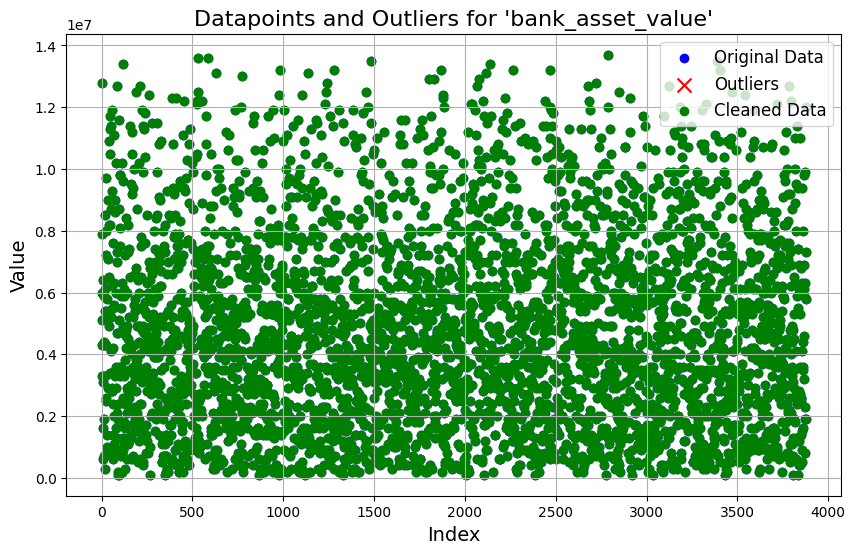

Processing column: loan_amount


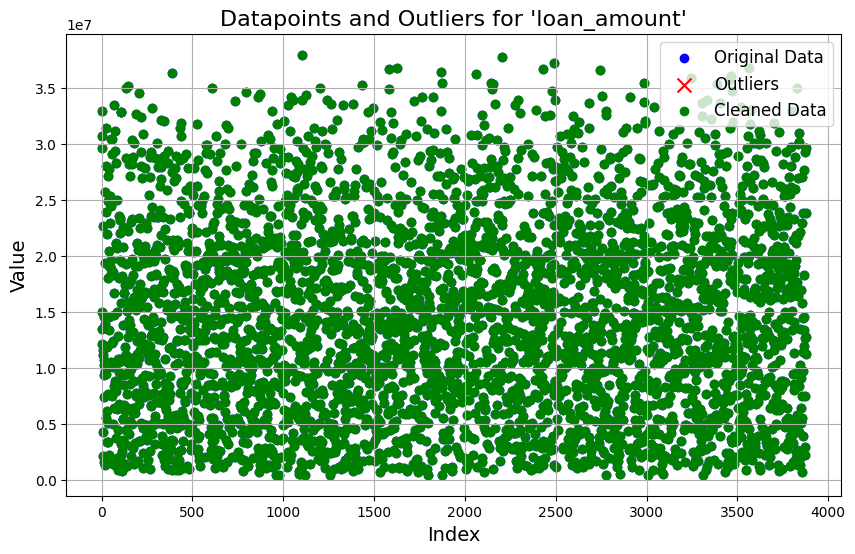

Processing column: cibil_score


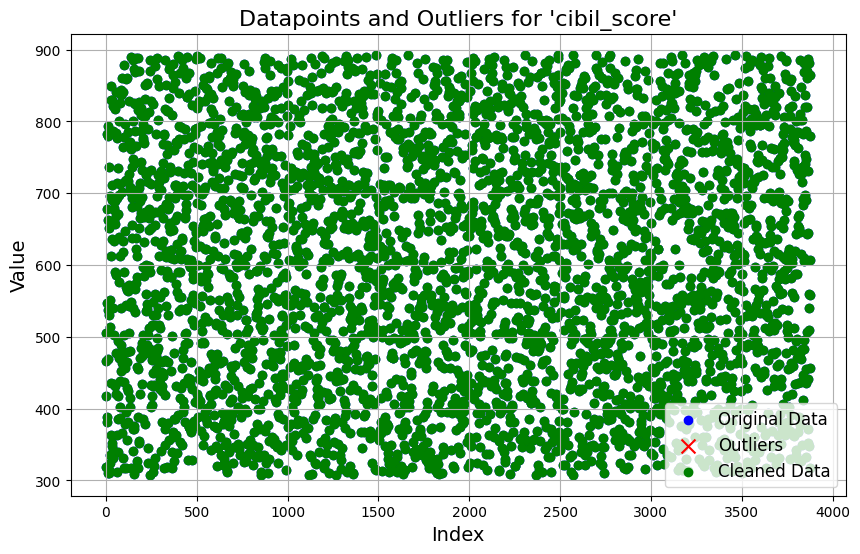

Processing column: luxury_assets_value


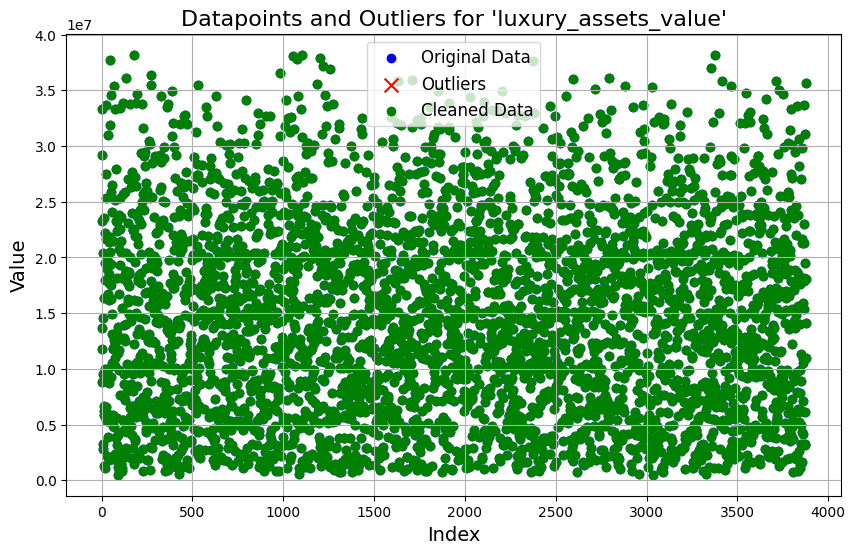

Processing column: bank_asset_value


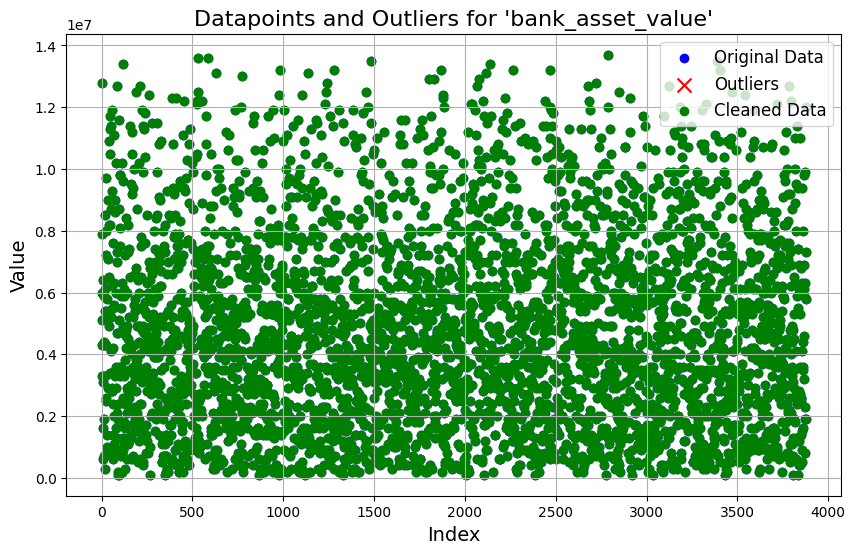

Cleaned Data:
      loan_id  no_of_dependents      education self_employed  income_annum  \
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
5           6                 0       Graduate           Yes       4800000   
6           7                 5       Graduate            No       8700000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  reside

In [23]:
columns_to_plot = [
  'income_annum', 'residential_assets_value', 'commercial_assets_value',
  'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

cleaned_data = data_3.copy()  

for column in columns_to_plot:
   print(f"Processing column: {column}")
   cleaned_data = visualize_outliers(cleaned_data, column, threshold=3.0)

print("Cleaned Data:")
print(cleaned_data)

In [24]:
numerical_columns = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]
categorical_columns = ['education', 'self_employed', 'loan_status']
discrete_columns = ['no_of_dependents']

data_scaled = data_3.copy()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_scaled[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data_scaled.index)
df_encoded = pd.concat([data_scaled, one_hot_df], axis=1)
df_encoded = df_encoded.drop(columns=categorical_columns)

print(f"One-hot encoded data: \n{df_encoded.head()}")

columns_to_scale = numerical_columns + discrete_columns
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(f"Fully scaled data: \n{df_encoded.head(10)}")

One-hot encoded data: 
   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
5        6                 0       4800000     13500000         10   
6        7                 5       8700000     33000000          4   

   cibil_score  residential_assets_value  commercial_assets_value  \
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
5          319                   6800000                  8300000   
6          678                  22500000                 14800000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
1              8800000           3300000                  0.0   
2          

In [25]:
numerical_columns = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]
categorical_columns = ['education', 'self_employed', 'loan_status']
discrete_columns = ['no_of_dependents']

data_scaled = data_3.copy()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_scaled[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data_scaled.index)

df_encoded = pd.concat([data_scaled, one_hot_df], axis=1)

df_encoded = df_encoded.drop(columns=categorical_columns)

print(f"One-hot encoded data: \n{df_encoded.head()}")

columns_to_scale = numerical_columns + discrete_columns
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(f"Fully scaled data: \n{df_encoded.head(10)}")
df_encoded.to_csv('scaled_dataset_combined.csv', index=False)

One-hot encoded data: 
   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
5        6                 0       4800000     13500000         10   
6        7                 5       8700000     33000000          4   

   cibil_score  residential_assets_value  commercial_assets_value  \
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
5          319                   6800000                  8300000   
6          678                  22500000                 14800000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
1              8800000           3300000                  0.0   
2          

In [26]:
df_encoded.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')

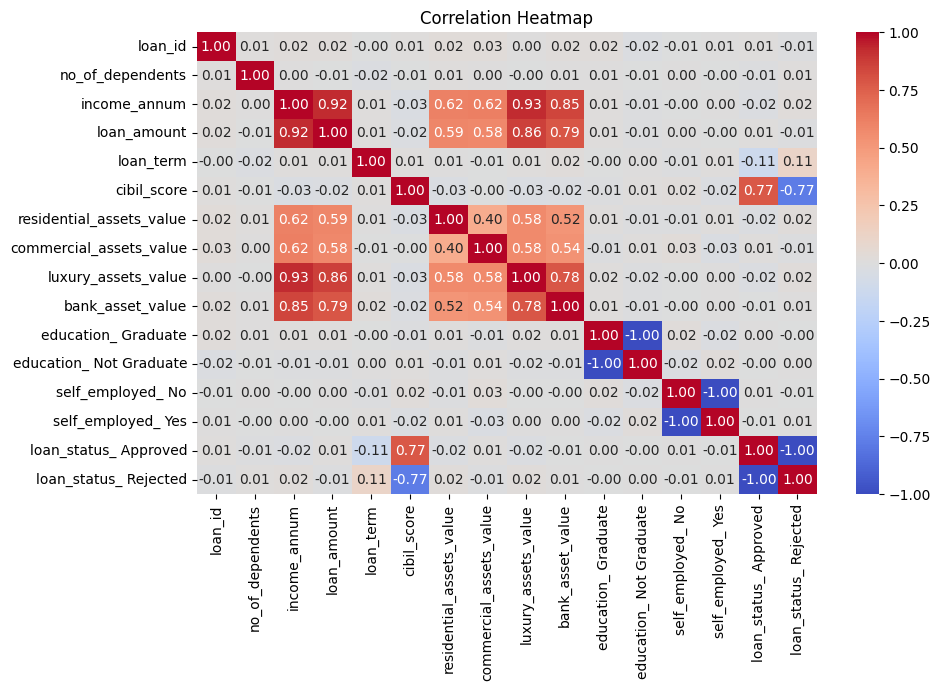

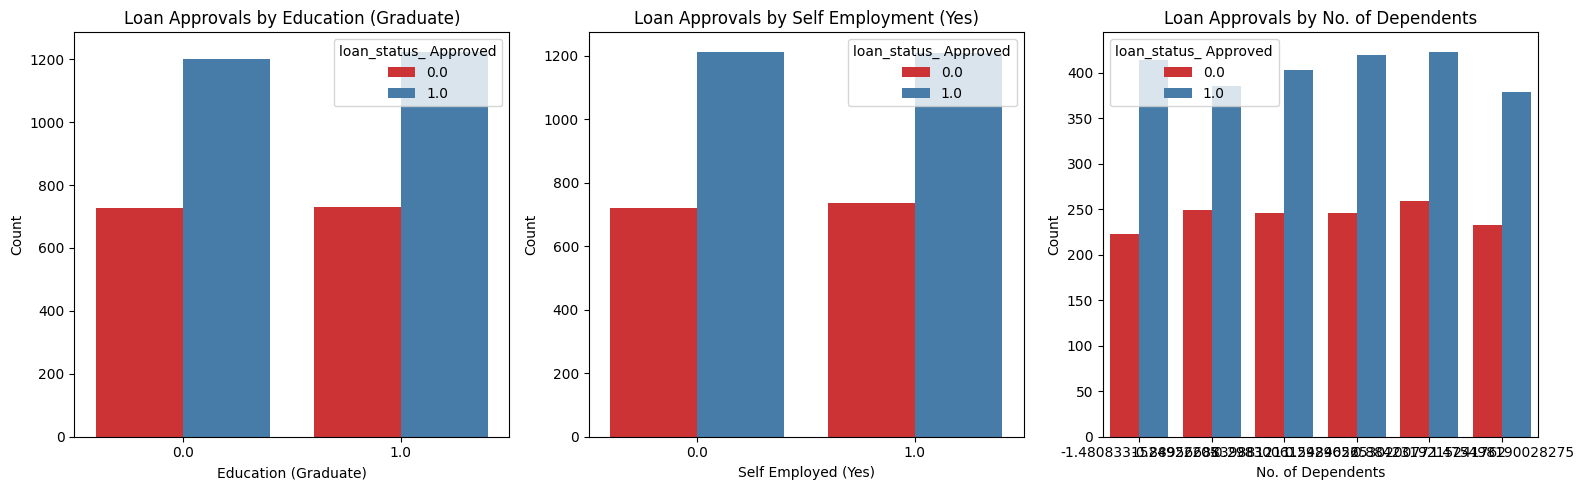

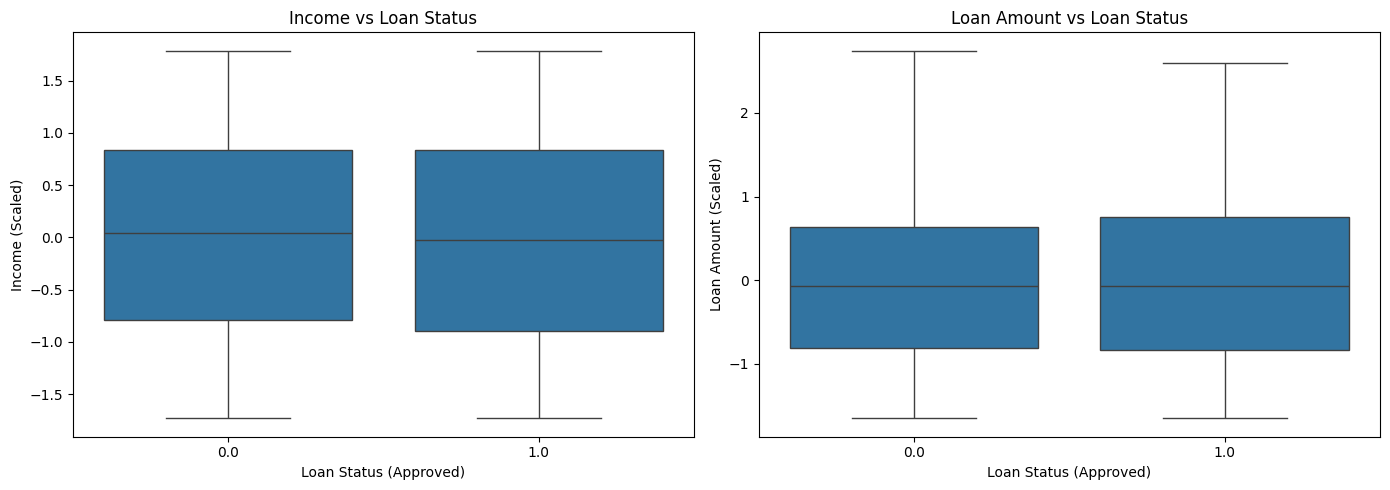

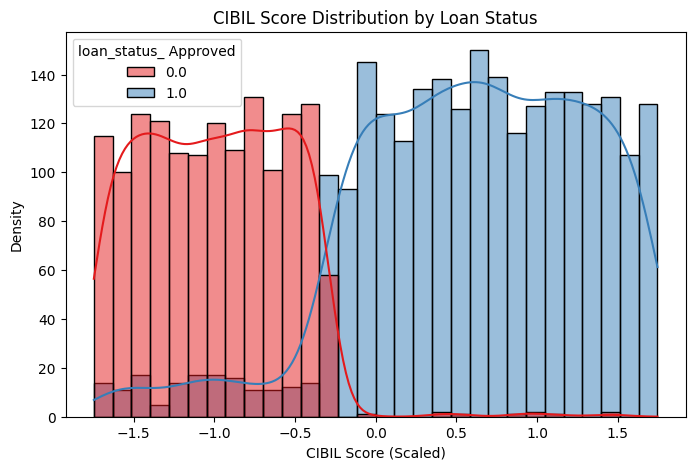

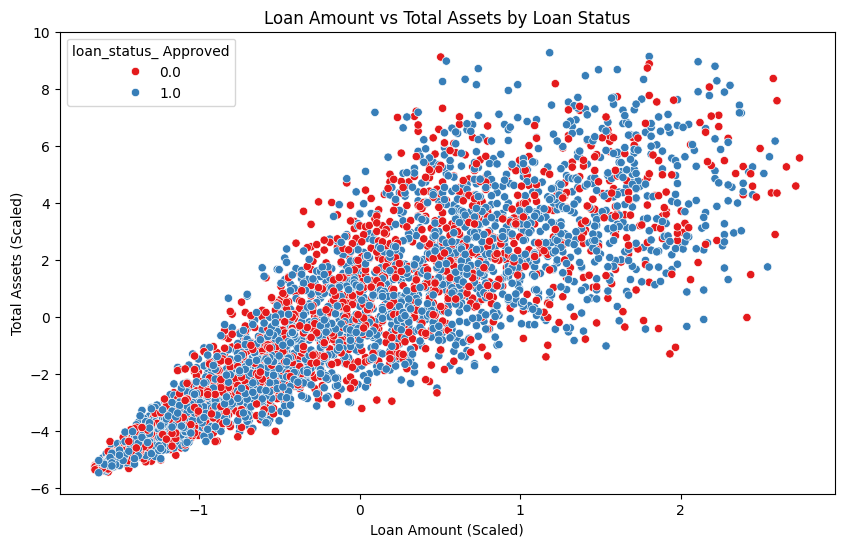

In [27]:
file_path = 'scaled_dataset_combined.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.countplot(
    data=data,
    x='education_ Graduate',  
    hue='loan_status_ Approved',
    palette='Set1'
)
plt.title('Loan Approvals by Education (Graduate)')
plt.xlabel('Education (Graduate)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(
    data=data,
    x='self_employed_ Yes',  
    hue='loan_status_ Approved',
    palette='Set1'
)
plt.title('Loan Approvals by Self Employment (Yes)')
plt.xlabel('Self Employed (Yes)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(
    data=data,
    x='no_of_dependents',
    hue='loan_status_ Approved',
    palette='Set1'
)
plt.title('Loan Approvals by No. of Dependents')
plt.xlabel('No. of Dependents')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='loan_status_ Approved', y='income_annum')
plt.title('Income vs Loan Status')
plt.xlabel('Loan Status (Approved)')
plt.ylabel('Income (Scaled)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='loan_status_ Approved', y='loan_amount')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status (Approved)')
plt.ylabel('Loan Amount (Scaled)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='cibil_score', hue='loan_status_ Approved', kde=True, bins=30, palette='Set1')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score (Scaled)')
plt.ylabel('Density')
plt.show()

data['total_assets'] = (
    data['residential_assets_value']
    + data['commercial_assets_value']
    + data['luxury_assets_value']
    + data['bank_asset_value']
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amount', y='total_assets', hue='loan_status_ Approved', palette='Set1')
plt.title('Loan Amount vs Total Assets by Loan Status')
plt.xlabel('Loan Amount (Scaled)')
plt.ylabel('Total Assets (Scaled)')
plt.show()

In [28]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected',
       'total_assets'],
      dtype='object')

Training Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       291
         1.0       0.94      0.94      0.94       485

    accuracy                           0.93       776
   macro avg       0.92      0.92      0.92       776
weighted avg       0.93      0.93      0.93       776



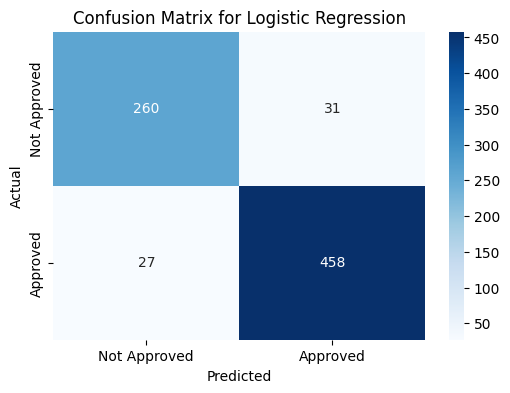

Training Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       291
         1.0       0.98      0.99      0.98       485

    accuracy                           0.98       776
   macro avg       0.98      0.97      0.98       776
weighted avg       0.98      0.98      0.98       776



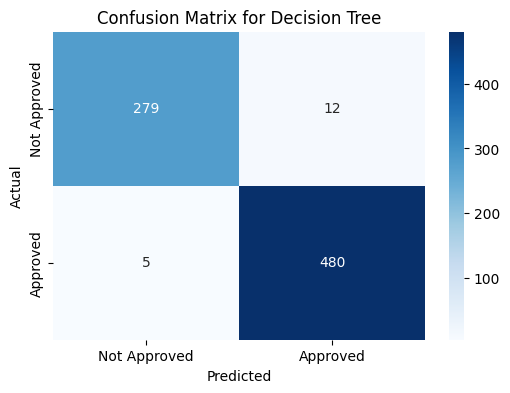

Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       291
         1.0       0.98      0.99      0.98       485

    accuracy                           0.98       776
   macro avg       0.98      0.98      0.98       776
weighted avg       0.98      0.98      0.98       776



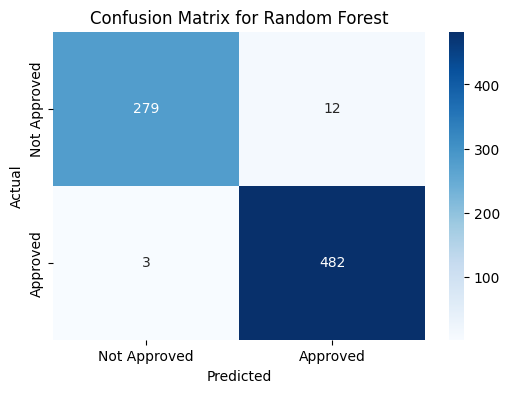

Training XGBoost...

Classification Report for XGBoost:

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       291
         1.0       0.98      1.00      0.99       485

    accuracy                           0.98       776
   macro avg       0.99      0.98      0.98       776
weighted avg       0.98      0.98      0.98       776



C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:59:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


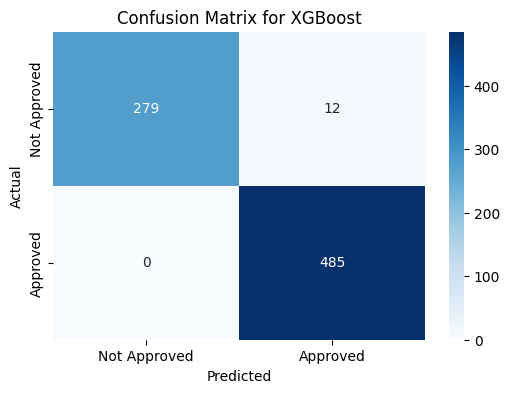

Training SVM...

Classification Report for SVM:

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       291
         1.0       0.97      0.95      0.96       485

    accuracy                           0.95       776
   macro avg       0.95      0.95      0.95       776
weighted avg       0.96      0.95      0.96       776



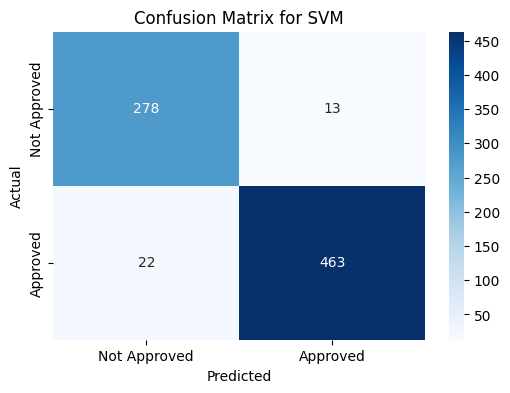

Training Neural Network...

Classification Report for Neural Network:

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       291
         1.0       0.98      0.98      0.98       485

    accuracy                           0.97       776
   macro avg       0.97      0.97      0.97       776
weighted avg       0.97      0.97      0.97       776



C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


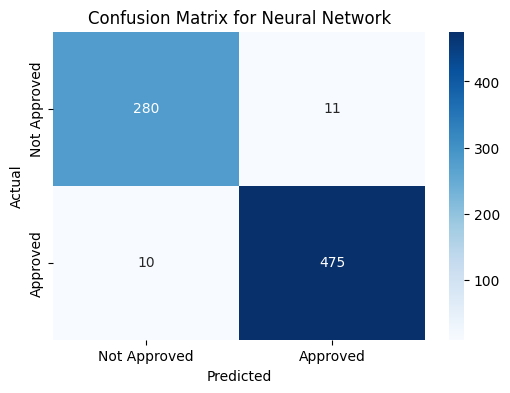


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.925258   0.936605  0.944330  0.940452  0.973578
1        Decision Tree  0.978093   0.975610  0.989691  0.982600  0.974227
2        Random Forest  0.980670   0.975709  0.993814  0.984678  0.998271
3              XGBoost  0.984536   0.975855  1.000000  0.987780  0.998881
4                  SVM  0.954897   0.972689  0.954639  0.963580  0.986913
5       Neural Network  0.972938   0.977366  0.979381  0.978373  0.996316


In [29]:
X = data[
    [
        'no_of_dependents', 'education_ Graduate', 'self_employed_ Yes',
        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'residential_assets_value', 'commercial_assets_value',
        'luxury_assets_value', 'bank_asset_value'
    ]
]
y = data['loan_status_ Approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Not Approved', 'Approved'],
        yticklabels=['Not Approved', 'Approved']
    )
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(results_df)

results_df.to_csv('model_comparison_results.csv', index=False)

In [30]:
treebagged_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  
    n_estimators=50,  
    random_state=42
)

models['TreeBagged'] = treebagged_clf

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9253
Precision: 0.9366
Recall: 0.9443
F1-Score: 0.9405
ROC-AUC: 0.9736
Confusion Matrix:
[[260  31]
 [ 27 458]]

Training Decision Tree...
Model: Decision Tree
Accuracy: 0.9781
Precision: 0.9756
Recall: 0.9897
F1-Score: 0.9826
ROC-AUC: 0.9742
Confusion Matrix:
[[279  12]
 [  5 480]]

Training Random Forest...
Model: Random Forest
Accuracy: 0.9807
Precision: 0.9757
Recall: 0.9938
F1-Score: 0.9847
ROC-AUC: 0.9983
Confusion Matrix:
[[279  12]
 [  3 482]]

Training XGBoost...
Model: XGBoost
Accuracy: 0.9845
Precision: 0.9759
Recall: 1.0000
F1-Score: 0.9878
ROC-AUC: 0.9989
Confusion Matrix:
[[279  12]
 [  0 485]]

Training SVM...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:59:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: SVM
Accuracy: 0.9549
Precision: 0.9727
Recall: 0.9546
F1-Score: 0.9636
ROC-AUC: 0.9869
Confusion Matrix:
[[278  13]
 [ 22 463]]

Training Neural Network...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
Accuracy: 0.9729
Precision: 0.9774
Recall: 0.9794
F1-Score: 0.9784
ROC-AUC: 0.9963
Confusion Matrix:
[[280  11]
 [ 10 475]]

Training TreeBagged...
Model: TreeBagged
Accuracy: 0.9832
Precision: 0.9777
Recall: 0.9959
F1-Score: 0.9867
ROC-AUC: 0.9972
Confusion Matrix:
[[280  11]
 [  2 483]]


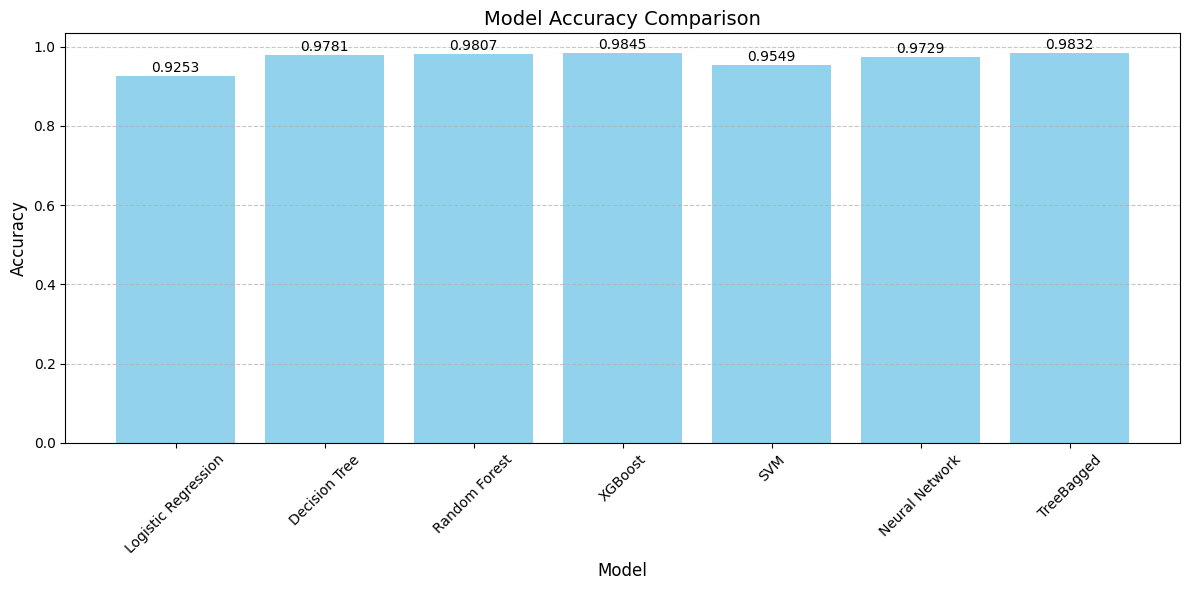

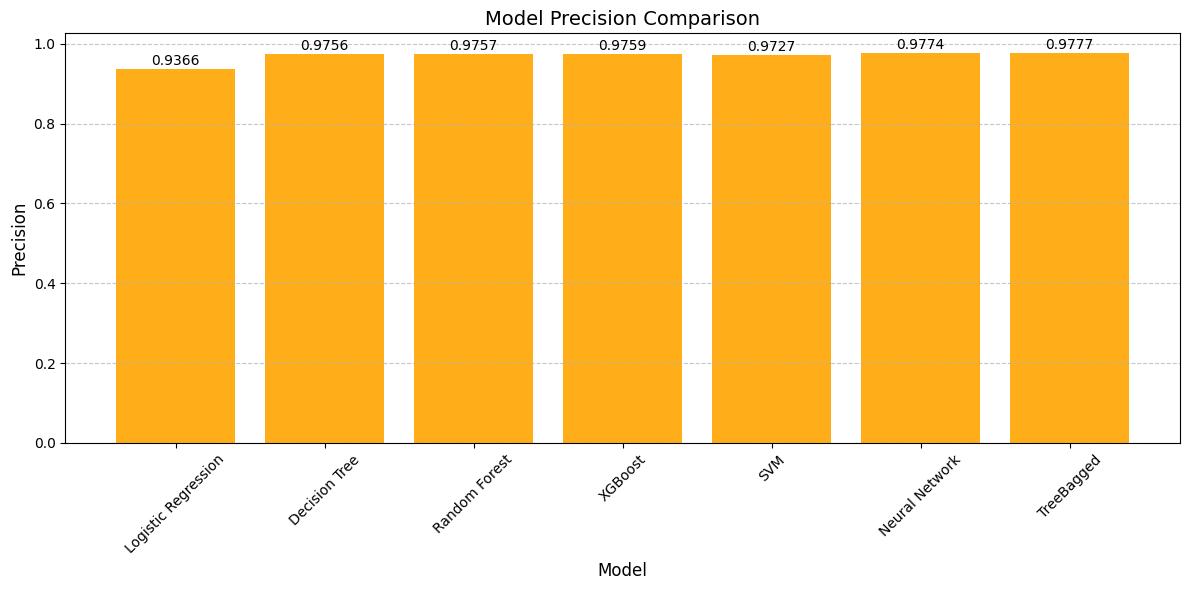

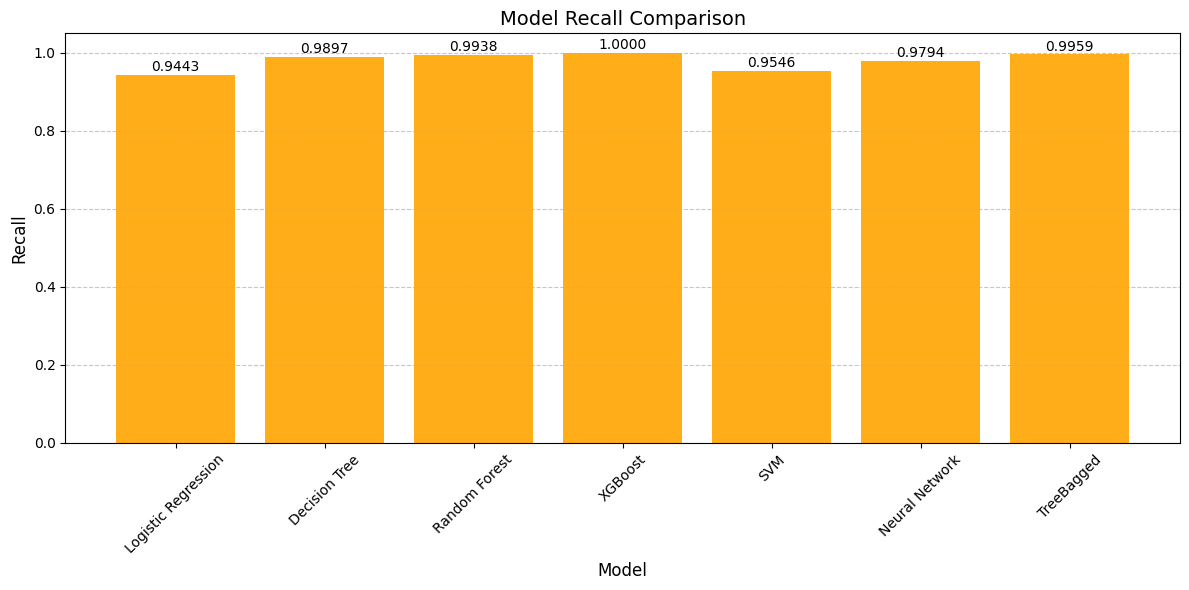

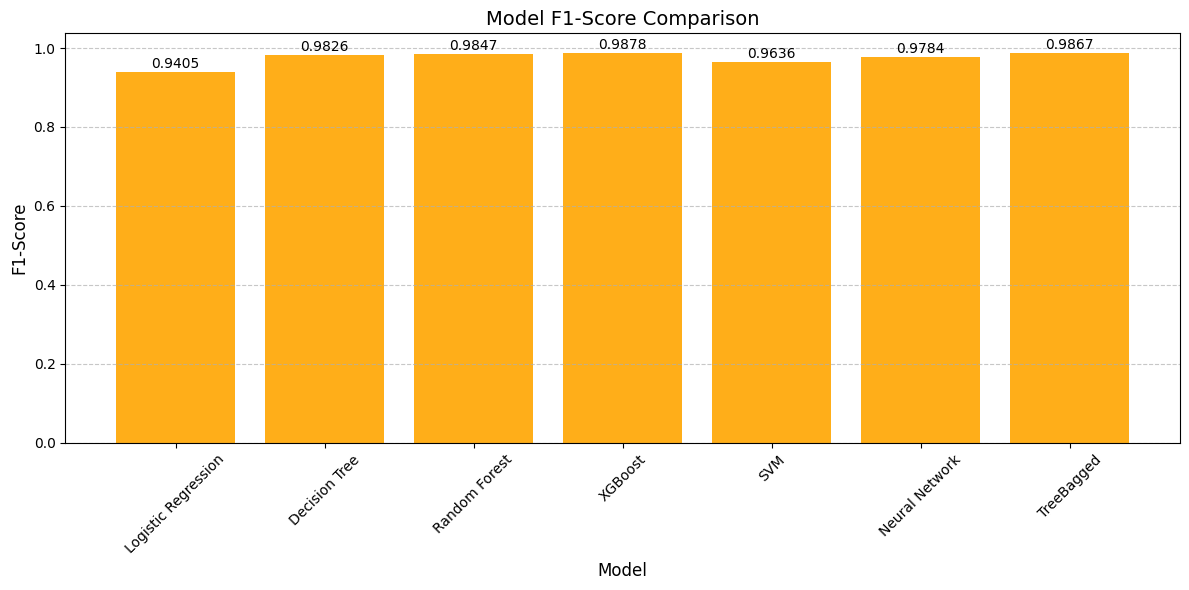

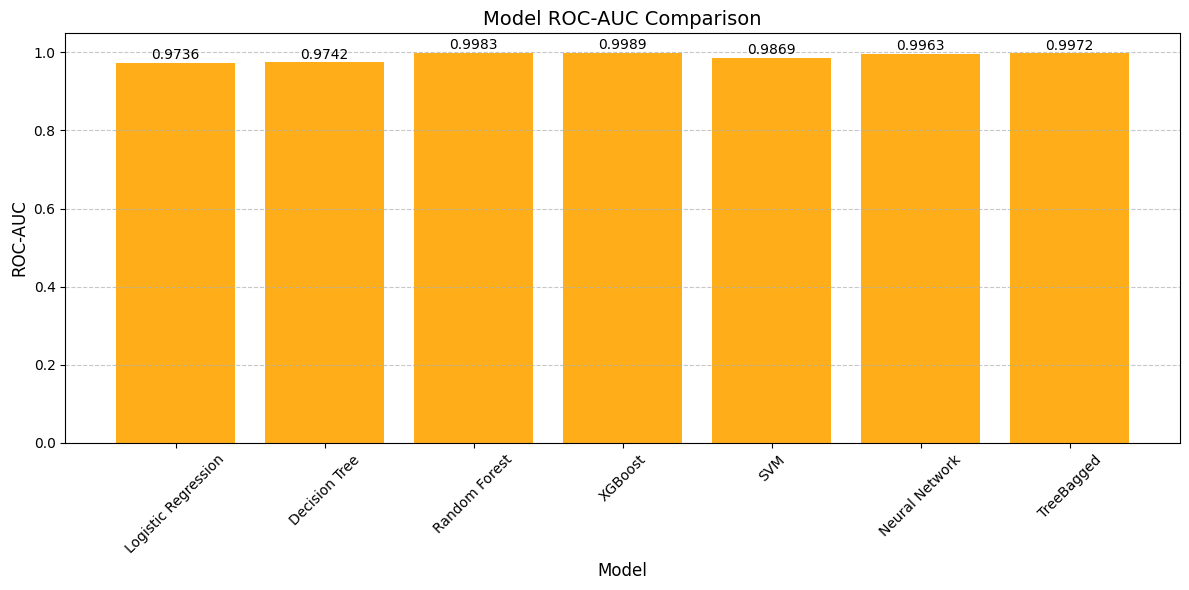

In [31]:
results_df = pd.DataFrame({
    'Model': [
        'Logistic Regression', 
        'Decision Tree', 
        'Random Forest', 
        'XGBoost', 
        'SVM', 
        'Neural Network', 
        'TreeBagged'
    ],
    'Accuracy': [0.9253, 0.9781, 0.9807, 0.9845, 0.9549, 0.9729, 0.9832],
    'Precision': [0.9366, 0.9756, 0.9757, 0.9759, 0.9727, 0.9774, 0.9777],
    'Recall': [0.9443, 0.9897, 0.9938, 1.0000, 0.9546, 0.9794, 0.9959],
    'F1-Score': [0.9405, 0.9826, 0.9847, 0.9878, 0.9636, 0.9784, 0.9867],
    'ROC-AUC': [0.9736, 0.9742, 0.9983, 0.9989, 0.9869, 0.9963, 0.9972]
})

plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue', alpha=0.9, label='Accuracy')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(results_df['Accuracy']):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df['Model'], results_df[metric], color='orange', alpha=0.9, label=metric)
    plt.title(f'Model {metric} Comparison', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, value in enumerate(results_df[metric]):
        plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

In [32]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected',
       'total_assets'],
      dtype='object')

In [33]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value', 'loan_amount', 'cibil_score'
]

results = {}

for column in columns_to_plot:
    if column in data.columns:
        group_0 = data[data['loan_status_ Approved'] == 0][column].dropna()  
        group_1 = data[data['loan_status_ Approved'] == 1][column].dropna()   

        if len(group_0) > 1 and len(group_1) > 1:
            stat, p_value = kruskal(group_0, group_1)
            results[column] = {'H-statistic': stat, 'p-value': p_value}
        else:
            results[column] = {'H-statistic': None, 'p-value': None}
    else:
        results[column] = {'H-statistic': None, 'p-value': None}

results_df = pd.DataFrame(results).T

print("Kruskal-Wallis Test Results:")
print(results_df)

significant_results = results_df[results_df['p-value'] < 0.05]
print("\nSignificant Features (p-value < 0.05):")
print(significant_results)


Kruskal-Wallis Test Results:
                          H-statistic   p-value
income_annum                 1.205079  0.272309
residential_assets_value     1.850906  0.173678
commercial_assets_value      0.541656  0.461747
luxury_assets_value          1.529315  0.216215
bank_asset_value             0.583180  0.445069
loan_amount                  0.490015  0.483921
cibil_score               2324.474850  0.000000

Significant Features (p-value < 0.05):
             H-statistic  p-value
cibil_score   2324.47485      0.0


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       291
         1.0       0.98      1.00      0.99       485

    accuracy                           0.98       776
   macro avg       0.99      0.98      0.98       776
weighted avg       0.98      0.98      0.98       776



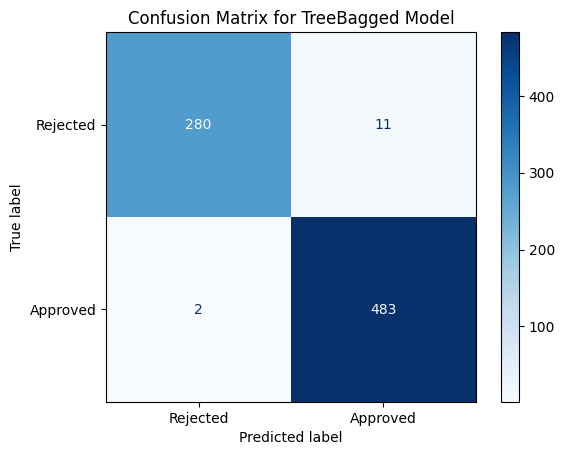

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

treebagged_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
treebagged_clf.fit(X_train, y_train)

y_pred = treebagged_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues', values_format='d')
disp.ax_.set_title('Confusion Matrix for TreeBagged Model')

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [35]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected',
       'total_assets'],
      dtype='object')

In [36]:
data.dtypes

loan_id                       int64
no_of_dependents            float64
income_annum                float64
loan_amount                 float64
loan_term                   float64
cibil_score                 float64
residential_assets_value    float64
commercial_assets_value     float64
luxury_assets_value         float64
bank_asset_value            float64
education_ Graduate         float64
education_ Not Graduate     float64
self_employed_ No           float64
self_employed_ Yes          float64
loan_status_ Approved       float64
loan_status_ Rejected       float64
total_assets                float64
dtype: object

C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


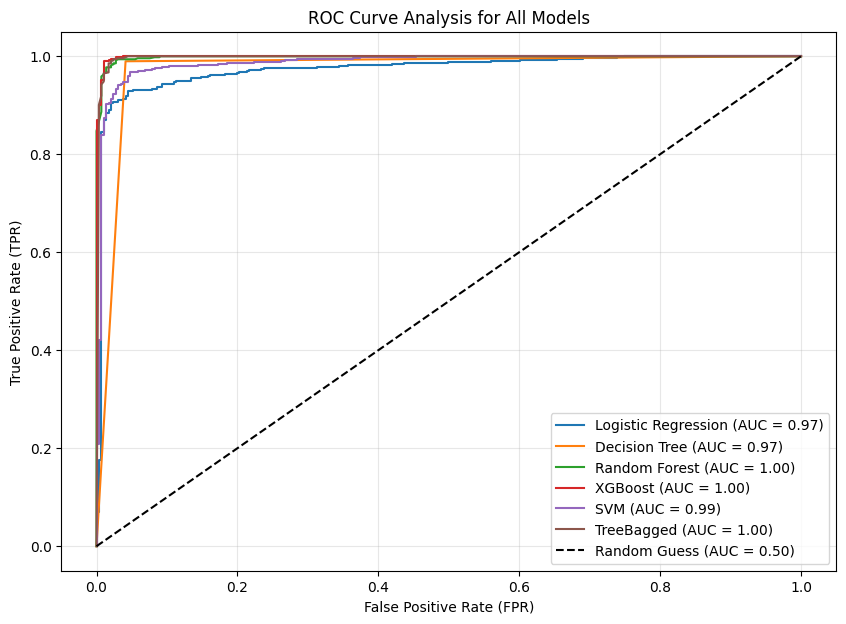

In [37]:
X = data[
    [
        'no_of_dependents', 'education_ Graduate', 'self_employed_ Yes',
        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'residential_assets_value', 'commercial_assets_value',
        'luxury_assets_value', 'bank_asset_value'
    ]
]
y = data['loan_status_ Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'TreeBagged': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

plt.title('ROC Curve Analysis for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [38]:
data.head(20)

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0         2         -1.480833     -0.293710    -0.279659  -0.506434   
1         3          0.292966      1.596243     1.769846   1.599095   
2         4          0.292966      1.256051     1.886960  -0.506434   
3         6         -1.480833     -0.029117    -0.127410  -0.155513   
4         7          1.475498      1.445047     2.156324  -1.208277   
5         8         -0.298301      0.311075     0.048262   1.599095   
6         9         -1.480833     -1.541079    -1.450804   1.599095   
7        10          1.475498     -1.427682    -1.204864  -0.155513   
8        11          0.884232     -0.747299    -0.396773  -1.559199   
9        12         -0.298301      0.689066     0.950044   1.248173   
10       13          0.292966      0.046481    -0.349928   0.897252   
11       15         -0.889567     -1.125289    -0.841809  -0.857356   
12       16          1.475498     -0.066916    -0.455331  -0.155513   
13       17         -0.298301     -1.654476    -1.521073  -1.208277   
14       18          0.884232     -0.747299    -0.607580   0.546330   
15       19         -0.298301     -0.822897    -0.502177  -0.155513   
16       20          1.475498      0.537869     0.001416   0.195409   
17       21         -0.298301      0.046481     0.563566   0.195409   
18       22          0.884232      0.348874    -0.068853   0.897252   
19       23          0.884232      0.613467     1.301388   1.248173   

    cibil_score  residential_assets_value  commercial_assets_value  \
0     -1.096346                 -0.736817                -0.616393   
1     -0.565028                  0.004937                -0.049820   
2     -0.797853                  1.876179                -0.345423   
3     -1.681394                 -0.045637                 0.886257   
4      0.461790                  2.601075                 2.487441   
5     -1.305292                  1.033277                 0.245784   
6      1.082657                 -0.972829                -0.961263   
7     -1.269473                 -0.652526                -0.813461   
8     -0.320263                  0.173517                -0.000552   
9     -0.373992                  1.387296                 0.270417   
10    -1.729153                 -0.113069                 1.206494   
11    -0.785913                 -0.871681                -0.862729   
12     1.154295                 -0.231076                -0.197621   
13     0.372242                 -0.972829                -1.133698   
14     1.070717                 -0.703101                -0.468591   
15     0.808043                 -1.023403                -1.158332   
16     0.306573                  0.544394                -0.296156   
17    -1.705273                  0.409530                -0.764194   
18    -0.421751                 -0.551378                 1.625265   
19    -1.729153                  1.016419                -0.739561   

    luxury_assets_value  bank_asset_value  education_ Graduate  \
0             -0.672947         -0.486505                  0.0   
1              2.170281          2.600794                  1.0   
2              1.009780          1.008398                  1.0   
3             -0.104302          0.098457                  1.0   
4              1.694476         -0.161526                  1.0   
5             -0.324797          0.390938                  1.0   
6             -1.369248         -1.363947                  1.0   
7             -1.311223         -1.038969                  0.0   
8             -0.591712         -0.551500                  1.0   
9              0.673234          0.520930                  0.0   
10             0.000144         -0.161526                  0.0   
11            -1.009493         -0.941475                  0.0   
12             0.209034         -0.129028                  0.0   
13            -1.543323         -1.331450                  1.0   
14            -0.916653         -0.161526          

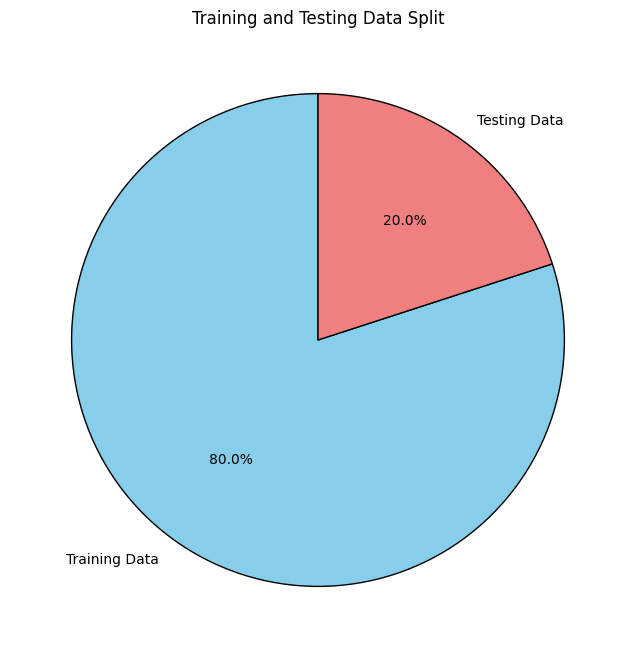

In [39]:
train_percentage = 80  
test_percentage = 20   

labels = ['Training Data', 'Testing Data']
sizes = [train_percentage, test_percentage]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Training and Testing Data Split')
plt.show()